In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 
import sys
import seaborn as sns

from tqdm import tqdm

import librosa
import librosa.display

import IPython.display as ipd  # возможность что то выводить в юпитер (видео, звук...)

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler


import tensorflow as tf
from tensorflow import  keras
from keras import layers
from keras.models import Sequential
from keras.utils import to_categorical

In [53]:
data_path = fr'C:\ML\DataBases\call_allice'

In [54]:
slice_file_name = []
labels = []
full_path = []
for fold in os.listdir(data_path):
    curent_folder = os.path.join(data_path, fold)
    for file in os.listdir(curent_folder):
        current_file = os.path.join(curent_folder, file)
        full_path.append(current_file)
        labels.append(fold)
        slice_file_name.append(file)

In [55]:
print(slice_file_name)

['2 мар., 10.07\u200b(2).wav', '2 мар., 10.07\u200b(3).wav', '2 мар., 10.07\u200b.wav', '2 мар., 10.08\u200b(2).wav', '2 мар., 10.08\u200b(3).wav', '2 мар., 10.08\u200b(4).wav', '2 мар., 10.08\u200b(5).wav', '2 мар., 10.08\u200b(6).wav', '2 мар., 10.08\u200b(7).wav', '2 мар., 10.08\u200b(8).wav', '2 мар., 10.08\u200b(9).wav', '2 мар., 10.08\u200b.wav', '2 мар., 10.09\u200b(10).wav', '2 мар., 10.09\u200b(11).wav', '2 мар., 10.09\u200b(12).wav', '2 мар., 10.09\u200b(13).wav', '2 мар., 10.09\u200b(14).wav', '2 мар., 10.09\u200b(15).wav', '2 мар., 10.09\u200b(16).wav', '2 мар., 10.09\u200b(17).wav', '2 мар., 10.09\u200b(18).wav', '2 мар., 10.09\u200b(2).wav', '2 мар., 10.09\u200b(3).wav', '2 мар., 10.09\u200b(4).wav', '2 мар., 10.09\u200b(5).wav', '2 мар., 10.09\u200b(6).wav', '2 мар., 10.09\u200b(7).wav', '2 мар., 10.09\u200b(8).wav', '2 мар., 10.09\u200b(9).wav', '2 мар., 10.09\u200b.wav', '2 мар., 10.10\u200b(10).wav', '2 мар., 10.10\u200b(11).wav', '2 мар., 10.10\u200b(12).wav', '2 мар

In [56]:
print(labels)

['alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 

In [57]:
print(full_path)

['C:\\ML\\DataBases\\call_allice\\alice\\2 мар., 10.07\u200b(2).wav', 'C:\\ML\\DataBases\\call_allice\\alice\\2 мар., 10.07\u200b(3).wav', 'C:\\ML\\DataBases\\call_allice\\alice\\2 мар., 10.07\u200b.wav', 'C:\\ML\\DataBases\\call_allice\\alice\\2 мар., 10.08\u200b(2).wav', 'C:\\ML\\DataBases\\call_allice\\alice\\2 мар., 10.08\u200b(3).wav', 'C:\\ML\\DataBases\\call_allice\\alice\\2 мар., 10.08\u200b(4).wav', 'C:\\ML\\DataBases\\call_allice\\alice\\2 мар., 10.08\u200b(5).wav', 'C:\\ML\\DataBases\\call_allice\\alice\\2 мар., 10.08\u200b(6).wav', 'C:\\ML\\DataBases\\call_allice\\alice\\2 мар., 10.08\u200b(7).wav', 'C:\\ML\\DataBases\\call_allice\\alice\\2 мар., 10.08\u200b(8).wav', 'C:\\ML\\DataBases\\call_allice\\alice\\2 мар., 10.08\u200b(9).wav', 'C:\\ML\\DataBases\\call_allice\\alice\\2 мар., 10.08\u200b.wav', 'C:\\ML\\DataBases\\call_allice\\alice\\2 мар., 10.09\u200b(10).wav', 'C:\\ML\\DataBases\\call_allice\\alice\\2 мар., 10.09\u200b(11).wav', 'C:\\ML\\DataBases\\call_allice\\alic

In [58]:
data = {
    'slice_file_name': slice_file_name,
    'full_path': full_path,
    'label': labels
}

metadata = pd.DataFrame(data)

In [59]:
metadata

,slice_file_name,full_path,label
0,"2 мар., 10.07​(2).wav","C:\ML\DataBases\call_allice\alice\2 мар., 10.0...",alice
1,"2 мар., 10.07​(3).wav","C:\ML\DataBases\call_allice\alice\2 мар., 10.0...",alice
2,"2 мар., 10.07​.wav","C:\ML\DataBases\call_allice\alice\2 мар., 10.0...",alice
3,"2 мар., 10.08​(2).wav","C:\ML\DataBases\call_allice\alice\2 мар., 10.0...",alice
4,"2 мар., 10.08​(3).wav","C:\ML\DataBases\call_allice\alice\2 мар., 10.0...",alice
...,...,...,...
227,"2 мар., 10.39​(6).wav","C:\ML\DataBases\call_allice\nn_words\2 мар., 1...",nn_words
228,"2 мар., 10.39​(7).wav","C:\ML\DataBases\call_allice\nn_words\2 мар., 1...",nn_words
229,"2 мар., 10.39​(8).wav","C:\ML\DataBases\call_allice\nn_words\2 мар., 1...",nn_words
230,"2 мар., 10.39​(9).wav","C:\ML\DataBases\call_allice\nn_words\2 мар., 1...",nn_words


In [60]:
metadata['label'].unique()

array(['alice', 'nn_words'], dtype=object)

In [61]:
metadata['label'].value_counts()

label
alice       122
nn_words    110
Name: count, dtype: int64

In [62]:
def feature_extractor(file_name):
    audio_data, sampling_rate = librosa.load(file_name)
    mfcc_features = librosa.feature.mfcc(y=audio_data, sr=sampling_rate, n_mfcc=40)
    scaled_mfcc_features = np.mean(mfcc_features.T, axis=0)
    return scaled_mfcc_features

In [63]:
extracted_features = []

for i, row in tqdm(metadata.iterrows()):
    data = feature_extractor(row['full_path'])
    label = row['label']
    extracted_features.append([data, label])

232it [00:01, 190.14it/s]


In [64]:
extracted_features = pd.DataFrame(extracted_features, columns=['data', 'class'])
extracted_features

,data,class
0,"[-412.46246, 95.298744, 19.03107, 16.639202, -...",alice
1,"[-418.79678, 81.41453, 10.811288, 9.448262, -4...",alice
2,"[-429.18228, 87.27611, 14.940756, 14.476623, -...",alice
3,"[-414.03558, 86.15739, 10.370214, 14.942941, 2...",alice
4,"[-342.9539, 96.30822, 13.77353, 28.41348, -2.6...",alice
...,...,...
227,"[-409.7457, 96.4879, -2.4802258, 45.11258, 19....",nn_words
228,"[-466.59955, 90.2987, 0.32288378, 20.807518, -...",nn_words
229,"[-420.3043, 154.19917, -20.681416, 10.442875, ...",nn_words
230,"[-461.48602, 106.35578, -7.605717, 16.831417, ...",nn_words


In [65]:
x = np.array(extracted_features['data'].to_list())
y = np.array(extracted_features['class'].to_list())

In [66]:
x.shape

(232, 40)

In [67]:
le = LabelEncoder()
y = to_categorical(le.fit_transform(y))
y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)

In [69]:
num_labels = y.shape[1]
num_labels

2

In [70]:
model = Sequential()

model.add(layers.Input(shape=(40,)))

# первый слой
model.add(layers.Dense(100))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))

# финальный слой
model.add(layers.Dense(num_labels))
model.add(layers.Activation('softmax'))

In [71]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 100)               4100      
                                                                 
 activation_8 (Activation)   (None, 100)               0         
                                                                 
 dropout_6 (Dropout)         (None, 100)               0         
                                                                 
 dense_9 (Dense)             (None, 2)                 202       
                                                                 
 activation_9 (Activation)   (None, 2)                 0         
                                                                 
Total params: 4302 (16.80 KB)
Trainable params: 4302 (16.80 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [72]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # используется если классы пересекаются между собой
              metrics=['accuracy', 'mae', 'mse']
              )

In [73]:
epochs = 200
batch_size = 32

callbacks = keras.callbacks.EarlyStopping(monitor='loss', patience=5, min_delta=0.008, verbose=0)

In [74]:
history = model.fit(
    x_train,
    y_train,
    validation_data=(x_test, y_test),
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/200


6/6 [==============================] - 0s 25ms/step - loss: 38.8022 - accuracy: 0.4757 - mae: 0.5273 - mse: 0.5248 - val_loss: 4.8906 - val_accuracy: 0.4043 - val_mae: 0.6030 - val_mse: 0.5518
Epoch 2/200
6/6 [==============================] - 0s 7ms/step - loss: 36.2815 - accuracy: 0.4649 - mae: 0.5404 - mse: 0.5355 - val_loss: 6.2367 - val_accuracy: 0.4468 - val_mae: 0.5574 - val_mse: 0.5480
Epoch 3/200
6/6 [==============================] - 0s 18ms/step - loss: 34.7365 - accuracy: 0.4865 - mae: 0.5152 - mse: 0.5114 - val_loss: 4.3516 - val_accuracy: 0.4894 - val_mae: 0.5127 - val_mse: 0.4978
Epoch 4/200
6/6 [==============================] - 0s 6ms/step - loss: 25.7228 - accuracy: 0.5081 - mae: 0.4877 - mse: 0.4816 - val_loss: 1.5196 - val_accuracy: 0.5745 - val_mae: 0.3963 - val_mse: 0.3369
Epoch 5/200
6/6 [==============================] - 0s 4ms/step - loss: 26.6643 - accuracy: 0.4811 - mae: 0.5195 - mse: 0.5154 - val_loss: 1.6535 - val_accuracy: 0.6809 - val_mae: 0.3307 - val_ms

In [75]:
test_metrics = model.evaluate(x_test, y_test)
test_metrics = zip(test_metrics, ['loss', 'accuracy', 'mae', 'mse'])
for num, metric in test_metrics:
    print(f'{metric}: {num}')

2/2 [==============================] - 0s 2ms/step - loss: 0.1294 - accuracy: 0.9787 - mae: 0.0224 - mse: 0.0212
loss: 0.12942250072956085
accuracy: 0.978723406791687
mae: 0.022448889911174774
mse: 0.02119252271950245


In [76]:
def full_plot_model_metrics(history):
    metrics = list(history.history.items())[:len(history.history.items())//2+1]
    val_metrics = list(history.history.items())[len(history.history.items())//2:]

    plt.figure(figsize=(30, 5))

    for i, metric, val_metric in zip(range(len(history.history.keys())), metrics, val_metrics):
        plt.subplot(1, len(history.history.items()), i+1)
        plt.plot(range(1, len(metric[1])+1), metric[1], c='blue', label='training')
        plt.plot(range(1, len(val_metric[1])+1), val_metric[1], c='red', label='validation')
        plt.legend(loc='upper right')
        plt.title(metric[0].upper())
        plt.xlabel('epochs')
        plt.ylabel(metric[0])
        plt.tight_layout(h_pad=2, w_pad=2)
        plt.grid(True)

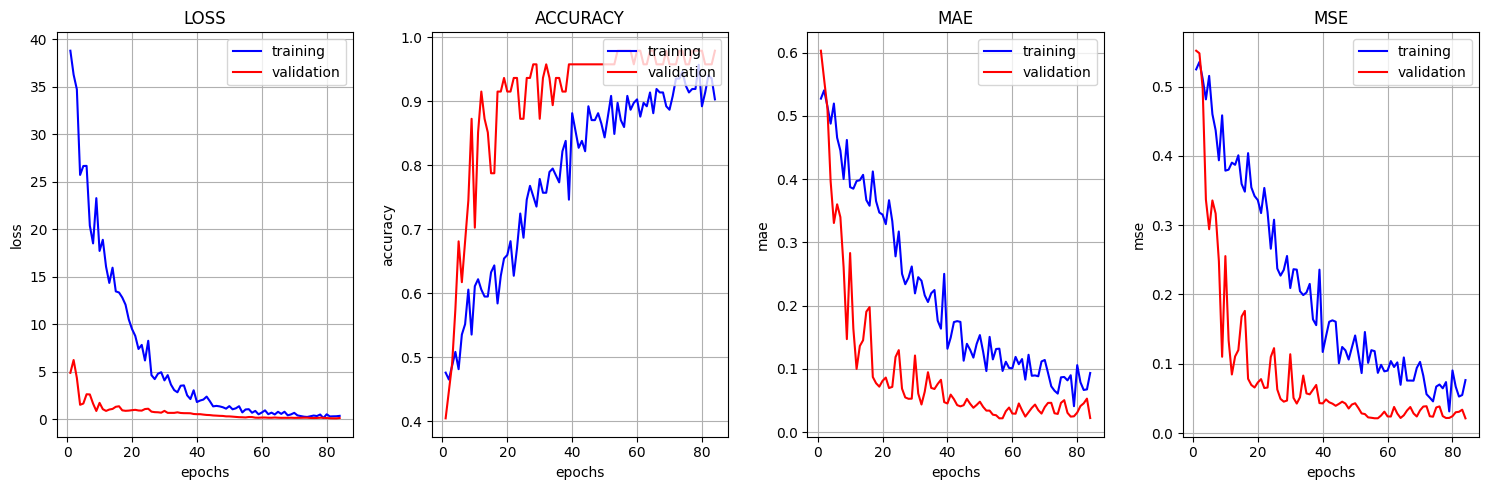

In [77]:
full_plot_model_metrics(history)

In [78]:
filepath=fr"2 мар., 11.16​(2).wav"
features =  feature_extractor(filepath)
features.shape

(40,)

In [79]:
ipd.Audio(filepath)

In [80]:
features = features.reshape(1, -1)
features.shape

(1, 40)

In [81]:
predict = model.predict(features)
predict

1/1 [==============================] - 0s 34ms/step


array([[1.0513866e-15, 1.0000000e+00]], dtype=float32)

In [82]:
label = np.argmax(predict, axis=1)
res = le.inverse_transform(label)
res

array(['nn_words'], dtype='<U8')